# Creating a Dashboard

In [22]:
%matplotlib inline

In [186]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import seaborn as sns
from ipywidgets import interact
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

[nltk_data] Downloading package stopwords to /Users/clau/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/clau/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [246]:
tweets = pd.read_json('climate_fly_2019.json', lines=True)

In [247]:
tweets[['created1', 'created2']] = tweets['created_at'].astype(str).str.split(' ', 0, expand=True)

In [248]:
tweets = tweets.drop(['created_at', 'created2'], axis=1)

In [288]:
tweets = tweets.rename(columns={'created1':'created_at'})

In [289]:
#tweets.head(2)

In [290]:
smaller_set = tweets[["created_at", "lang",'text',"source","retweet_count",'likes','quote_count','reply_count']]
smaller_set = smaller_set[smaller_set['lang'].isin(['en', 'es', 'fr', 'sv'])]
smaller_set = smaller_set[smaller_set['source'].isin(['Twitter for Android', 'Twitter for iPhone', 'Twitter for Web App', 'Twitter Web Client'])]
#smaller_set.head(2)

In [276]:
def remove_stopwords(sentence):
    tokenizer = RegexpTokenizer(r'\w+')
    no_punct = tokenizer.tokenize(sentence)
    sentence =' '.join([i for i in no_punct])
    stop_words = set(stopwords.words('english'))
    stop_words.add('https')
    stop_words.add('t co')
    stop_words.add('RT')
    stop_words.add('co')
    #print(stop_words)
    word_tokens = word_tokenize(sentence)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = []
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    filtered_sentence =' '.join([i for i in filtered_sentence])
    return filtered_sentence

In [277]:
full_text=' '.join([i for i in tweets['text']])
#print(full_text)

In [278]:
#remove stopwords
cleaned_sentence = remove_stopwords(full_text)
#print(cleaned_sentence)

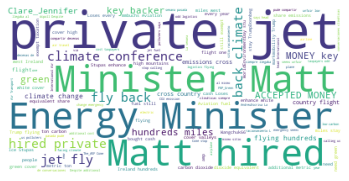

In [280]:
wordcloud = WordCloud().generate(cleaned_sentence)
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=len(cleaned_sentence),max_font_size=80, relative_scaling=.7).generate(cleaned_sentence)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [292]:
@interact(hue=['lang','source'])
def plot(hue):
    _ = sns.pairplot(smaller_set,hue=hue)

interactive(children=(Dropdown(description='hue', options=('lang', 'source'), value='lang'), Output()), _dom_c…

In [293]:
smaller_set_with_terms = smaller_set

In [294]:
smaller_set_with_terms['private_jet'] = smaller_set_with_terms['text'].str.contains('private jet')
smaller_set_with_terms['minister_matt'] = smaller_set_with_terms['text'].str.contains('minister matt')
smaller_set_with_terms['climate_conference'] = smaller_set_with_terms['text'].str.contains('climate conference')
smaller_set_with_terms['climate_change'] = smaller_set_with_terms['text'].str.contains('climate change')

In [295]:
@interact(hue=['private_jet'])
def plot(hue):
    _ = sns.pairplot(smaller_set_with_terms[["retweet_count",'likes','private_jet','quote_count','reply_count']],hue=hue)

interactive(children=(Dropdown(description='hue', options=('private_jet',), value='private_jet'), Output()), _…

In [296]:
@interact(hue=['climate_conference'])
def plot(hue):
    _ = sns.pairplot(smaller_set_with_terms[["retweet_count",'likes','climate_conference','quote_count','reply_count']],hue=hue)

interactive(children=(Dropdown(description='hue', options=('climate_conference',), value='climate_conference')…

In [297]:
@interact(hue=['climate_change'])
def plot(hue):
    _ = sns.pairplot(smaller_set_with_terms[["retweet_count",'likes','climate_change','quote_count','reply_count']],hue=hue)

interactive(children=(Dropdown(description='hue', options=('climate_change',), value='climate_change'), Output…